In [12]:
import numpy as np
import pandas as pd
import re
import altair as alt
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans

pd.options.display.max_columns = None

In [5]:
df = pd.read_csv("ACE Mission Cleaned.csv").iloc[:, 2:]
df.head()

,proton_density,proton_temp,He4toprotons,proton_speed
0,16.655,9529.1,0.0127,323.90
1,20.601,8757.7,0.0141,322.89
2,18.679,9559.4,0.0087,324.61
3,18.481,8965.9,0.0051,322.68
4,28.315,8329.0,0.0061,321.84


In [10]:
scaled_df = StandardScaler().fit_transform(df)

array([[ 2.26553702, -1.16673216,  0.27547062, -1.39687405],
       [ 3.09368364, -1.176946  ,  0.27547117, -1.40740512],
       [ 2.69031369, -1.16633096,  0.27546906, -1.38947101],
       ...,
       [-0.13768321, -0.72568715, -3.63005377,  0.01668831],
       [-0.26024724, -0.93541918, -3.63005377,  0.15911851],
       [-0.44304392, -0.72321115, -3.63005377,  0.04786447]])

In [13]:
cluster = []
calinski = []
davies = []

for k in range(2,10):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1, random_state=4).fit(scaled_df)
    labels = kmeans.labels_
    
    cluster.append(k)
    calinski.append(metrics.calinski_harabasz_score(scaled_df, labels))
    davies.append(davies_bouldin_score(scaled_df, labels))

In [14]:
cluster_scores = pd.DataFrame({'num_cluster': cluster, 'calinski': calinski, 'davies': davies})
cluster_scores

,num_cluster,calinski,davies
0,2,58467.637193,1.136518
1,3,76025.939822,0.830049
2,4,81291.652815,0.783180
3,5,75950.067238,0.888079
4,6,74324.820222,0.916378
5,7,75540.862619,0.903583
6,8,74322.667194,0.968479
7,9,71943.253278,0.951760


Text(0.5, 0.98, 'Scoring to Determine Optimal Number of Clusters \n Looking for clusters that have a low Davies-Bouldin score but a high Calinski-Harabasz score')

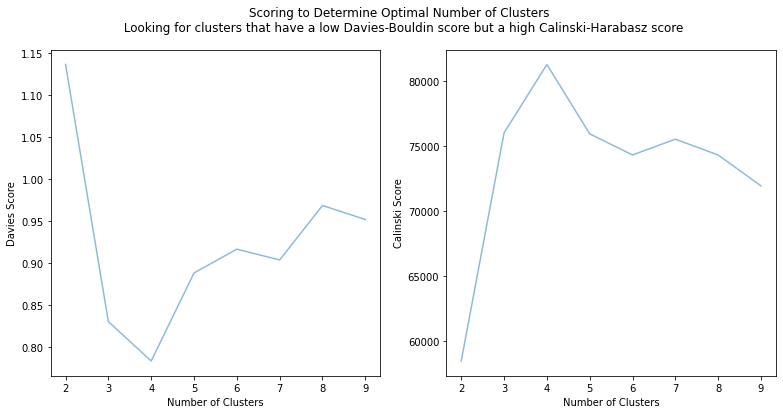

In [17]:

#create a figure to view each score for each number of clusters
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(13, 6))

ax1.plot(cluster_scores['num_cluster'], cluster_scores['davies'], alpha=0.5)
ax1.set_ylabel('Davies Score')
ax1.set_xlabel('Number of Clusters')

ax2.plot(cluster_scores['num_cluster'], cluster_scores['calinski'], alpha=0.5)
ax2.set_ylabel('Calinski Score')
ax2.set_xlabel('Number of Clusters')

fig.suptitle('Scoring to Determine Optimal Number of Clusters \n Looking for clusters that have a low Davies-Bouldin score but a high Calinski-Harabasz score')
     

In [18]:
#Elbow Plot to Determine best number of clusters
#https://github.com/y656/Weather-data-clustering/blob/main/code%20file%20.ipynb

sum_of_squared_distances = []
K = range(2,10)
for k in K:
    k_means = KMeans(n_clusters=k,init = 'k-means++',n_init = 1)
    model = k_means.fit(scaled_df)
    sum_of_squared_distances.append(k_means.inertia_)

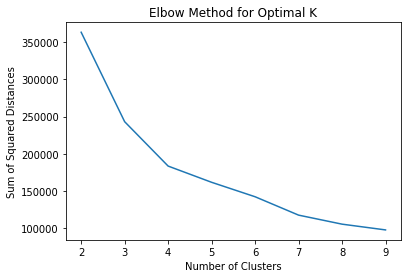

In [19]:

plt.plot(K, sum_of_squared_distances)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal K')
plt.show()

In [21]:
optimal_k = 4 #appears to be optimal; 2 is too few and 4 is the best of the rest

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=100, n_init=1, random_state=4).fit(scaled_df)

In [26]:
#https://towardsdatascience.com/clustering-with-k-means-1e07a8bfb7ca
#function that creates a dataframe with a column for cluster number
centers = kmeans.cluster_centers_
def pd_centers(cols_of_interest, centers):
    random_state=4
    colNames = cols_of_interest.copy()
    colNames.append('prediction')
    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]
    # Convert to pandas data frame for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P
P = pd_centers(['Proton Density', 'Proton Temp', 'He4toproton', 'Speed'], centers)
P #these are the transformed values

,Proton Density,Proton Temp,He4toproton,Speed,prediction
0,-0.130021,-0.473264,0.275478,-0.481052,0
1,2.459650,-0.463199,0.234078,-0.682630,1
2,-0.083178,0.901480,-3.630054,0.011042,2
3,-0.432486,0.986801,0.275362,1.312516,3


In [27]:
Pcenters = pd.melt(P, id_vars = ['prediction'], var_name = 'var', value_name = 'val')
Pcenters['prediction'] = Pcenters['prediction'].astype(str)
fig = px.scatter(Pcenters, x='val', y='prediction', color='var', 
            labels=dict(val='Value', var='Features', prediction='Predicted Cluster'),
                title='K-Means Clustering of Daily Weather Typologies')
fig.update_layout(plot_bgcolor='white', autosize=False, width=900, height=500, title={'x':0.5, 'xanchor':'center', 'y':0.875})
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    zerolinecolor='black', zerolinewidth=0.25,
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    zerolinecolor='black',
    gridcolor='lightgrey'
)
fig.update_traces(marker=dict(size=12))
     